In [7]:
#Importing libraries
import pandas as pd
! pip install alpha-vantage
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import matplotlib.dates as matDates

In [2]:
#Loading Covid Confirmed Cases
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,333746


In [3]:
#Loading Covid Death Cases
df_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


In [4]:
#Finding total confirmed cases by region
df_confirmed['Confirmed_Cases'] = df_confirmed.iloc[:,4:].sum(axis=1)
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,Confirmed_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205612,205802,205830,205907,206073,206133,206145,206206,206273,110421190
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333330,333330,333338,333343,333360,333381,333391,333408,333413,154163521
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271061,271079,271082,271090,271096,271100,271102,271107,271113,157237915
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,47219,47219,47219,47219,47219,47219,20057421
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104676,104676,104676,104676,104676,104750,50145291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,346441416
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,164172
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,6756605
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333746,333746,333746,333746,333746,333746,333746,164137486


In [5]:
#Finding total death cases by region
df_death['Death_Cases'] = df_death.iloc[:,4:].sum(axis=1)
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,Death_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7834,7834,7834,7834,7835,4681699
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,2147369
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,4254461
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,157,157,157,157,157,157,111779
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1924,1924,1924,1924,1924,1925,1050413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,3218157
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,1312500
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,2252161


In [6]:
#Merged the confirmed and death cases dataframes globally
data1=df_death[["Province/State","Country/Region","Death_Cases"]]
data2=df_confirmed[["Province/State","Country/Region","Confirmed_Cases"]]
df_merge = pd.merge(data1,data2,on=["Province/State",'Country/Region'])
df_merge

,Province/State,Country/Region,Death_Cases,Confirmed_Cases
0,NaN,Afghanistan,4681699,110421190
1,NaN,Albania,2147369,154163521
2,NaN,Algeria,4254461,157237915
3,NaN,Andorra,111779,20057421
4,NaN,Angola,1050413,50145291
...,...,...,...,...
284,NaN,West Bank and Gaza,3218157,346441416
285,NaN,Winter Olympics 2022,0,164172
286,NaN,Yemen,1312500,6756605
287,NaN,Zambia,2252161,164137486


In [12]:
#Get AlphaVantage API key
#Fetched data from Overall American Market,Overall Canadian Market,Travel sector,The Real Estate sector,Precious metals

key = 'TJCKKU6E3GPAZ2BR'
ts=TimeSeries(key,output_format="pandas")
Overall_americanmarket=ts.get_weekly_adjusted('NASDX')
Overall_canadianmarket=ts.get_weekly_adjusted('TSE') 
Overall_travel_sector=ts.get_weekly_adjusted('DIS') # The Walt Disney 
Overall_real_estate=ts.get_weekly_adjusted('VNQ') #Vanguard Real Estate
Overall_precious=ts.get_weekly_adjusted('GOLD') #Agnico Eagle Mines Ltd

In [13]:
#Created dataframe for each Overall American Market,Overall Canadian Market,Travel sector,The Real Estate sector,Precious metals

df_american = pd.DataFrame(Overall_americanmarket[0]).reset_index(level=0)
df_canadian = pd.DataFrame(Overall_canadianmarket[0]).reset_index(level=0)
df_travel = pd.DataFrame(Overall_travel_sector[0]).reset_index(level=0)
df_real_estate = pd.DataFrame(Overall_real_estate[0]).reset_index(level=0)
df_precious = pd.DataFrame(Overall_precious[0]).reset_index(level=0)

In [14]:
df_american

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-02,25.75,26.01,25.57,25.90,25.9000,0.0,0.7655
1,2022-11-25,25.68,26.31,25.68,26.13,25.3819,0.0,0.0000
2,2022-11-18,26.00,26.37,25.95,25.95,25.2070,0.0,0.0000
3,2022-11-11,24.38,26.25,23.99,26.25,25.4984,0.0,0.0000
4,2022-11-04,25.33,25.33,23.74,24.12,23.4294,0.0,0.0000
...,...,...,...,...,...,...,...,...
1188,2000-02-25,10.30,11.06,10.30,10.85,8.4925,0.0,0.0000
1189,2000-02-18,10.40,10.70,10.30,10.30,8.0620,0.0,0.0000
1190,2000-02-11,10.34,10.66,10.34,10.39,8.1325,0.0,0.0000
1191,2000-02-04,9.38,10.14,9.38,10.14,7.9368,0.0,0.0000


In [15]:
df_canadian

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,24.08,24.35,23.63,23.75,23.7500,251091.0,0.0
1,2022-12-02,24.01,25.44,23.23,24.24,24.2400,1728386.0,0.0
2,2022-11-25,23.25,25.12,22.54,24.59,24.5900,1078728.0,0.0
3,2022-11-18,27.14,28.17,23.62,23.83,23.8300,2676979.0,0.0
4,2022-11-11,24.09,27.86,22.62,27.49,27.4900,3072163.0,0.0
...,...,...,...,...,...,...,...,...
438,2014-07-18,21.19,21.43,19.55,19.96,16.3254,533200.0,0.0
439,2014-07-11,20.94,21.78,20.19,21.23,17.3642,483500.0,0.0
440,2014-07-03,21.60,22.18,20.22,20.81,17.0206,832400.0,0.0
441,2014-06-27,22.63,22.99,21.05,21.69,17.7404,722600.0,0.0


In [16]:
df_travel

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,98.24,99.1600,95.665,95.93,95.9300,10764540.0,0.00
1,2022-12-02,98.21,99.6900,93.870,99.43,99.4300,68705869.0,0.00
2,2022-11-25,100.12,100.8900,94.680,98.87,98.8700,118194758.0,0.00
3,2022-11-18,95.85,97.1800,90.850,91.80,91.8000,69763428.0,0.00
4,2022-11-11,100.88,101.9687,86.280,95.01,95.0100,159856755.0,0.00
...,...,...,...,...,...,...,...,...
1200,1999-12-10,27.88,28.4400,27.130,28.04,21.8071,47158800.0,0.00
1201,1999-12-03,28.06,28.9400,27.500,28.25,21.9704,44339000.0,0.00
1202,1999-11-26,26.50,28.6900,26.500,27.56,21.4338,29478900.0,0.00
1203,1999-11-19,25.56,27.1900,25.500,26.75,20.8039,55034800.0,0.00


In [17]:
df_real_estate 

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,87.37,87.37,85.840,86.03,86.0300,5983225.0,0.0
1,2022-12-02,86.55,89.38,84.510,87.63,87.6300,26139028.0,0.0
2,2022-11-25,85.20,87.06,84.940,87.04,87.0400,12968966.0,0.0
3,2022-11-18,86.51,86.62,83.600,85.50,85.5000,24032748.0,0.0
4,2022-11-11,82.09,87.89,80.865,86.99,86.9900,30875294.0,0.0
...,...,...,...,...,...,...,...,...
944,2004-11-05,53.20,54.45,52.900,52.98,24.2181,89400.0,0.0
945,2004-10-29,52.20,53.43,51.810,53.10,24.2729,95100.0,0.0
946,2004-10-22,52.35,53.00,51.640,52.24,23.8798,93000.0,0.0
947,2004-10-15,51.50,52.38,51.000,52.38,23.9438,39600.0,0.0


In [18]:
df_precious

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,16.81,16.9092,16.4700,16.52,16.5200,21242900.0,0.0000
1,2022-12-02,16.05,17.3400,15.5000,16.98,16.9800,117219534.0,0.0500
2,2022-11-25,15.51,16.3000,15.1344,16.02,15.9697,52029706.0,0.0000
3,2022-11-18,16.33,16.4500,15.3500,15.62,15.5709,85474722.0,0.0000
4,2022-11-11,14.29,16.5800,14.1800,16.44,16.3884,123797348.0,0.0000
...,...,...,...,...,...,...,...,...
1200,1999-12-10,17.25,18.4400,17.1900,17.56,13.0970,6223500.0,0.0000
1201,1999-12-03,18.06,18.3100,17.3100,17.44,13.0075,8455600.0,0.0000
1202,1999-11-26,17.81,19.5600,17.5000,19.38,14.4544,9774400.0,0.1375
1203,1999-11-19,17.88,18.6300,17.5000,17.81,13.1895,7617200.0,0.0000


In [19]:
#Renamed the column names
df_american = df_american[['date','2. high','3. low']].rename(columns={"2. high":"US_high","3. low":"US_low"})
df_canadian = df_canadian[['date','2. high','3. low']].rename(columns={"2. high":"Canadian_high","3. low":"Canadian_low"})
df_travel = df_travel[['date','2. high','3. low']].rename(columns={"2. high":"travel_high","3. low":"travel_low"})
df_real_estate = df_real_estate[['date','2. high','3. low']].rename(columns={"2. high":"RealEstate_high","3. low":"RealEstate_low"})
df_precious = df_precious[['date','2. high','3. low']].rename(columns={"2. high":"Precious_Metal_High","3. low":"Precious_Metal_Low"})

In [20]:
#Code to populate all dataFrame
df_american
#df_canadian
#df_travel
#df_real_estate
#df_precious

,date,US_high,US_low
0,2022-12-02,26.01,25.57
1,2022-11-25,26.31,25.68
2,2022-11-18,26.37,25.95
3,2022-11-11,26.25,23.99
4,2022-11-04,25.33,23.74
...,...,...,...
1188,2000-02-25,11.06,10.30
1189,2000-02-18,10.70,10.30
1190,2000-02-11,10.66,10.34
1191,2000-02-04,10.14,9.38


In [22]:
#Merging all the stocks dataFrame
df_stocks = df_american.merge(df_canadian, on="date").merge(df_precious, on="date").merge(df_real_estate,on="date").merge(df_travel,on="date")
df_stocks

,date,US_high,US_low,Canadian_high,Canadian_low,Precious_Metal_High,Precious_Metal_Low,RealEstate_high,RealEstate_low,travel_high,travel_low
0,2022-12-02,26.01,25.57,25.44,23.230,17.3400,15.5000,89.3800,84.5100,99.6900,93.87
1,2022-11-25,26.31,25.68,25.12,22.540,16.3000,15.1344,87.0600,84.9400,100.8900,94.68
2,2022-11-18,26.37,25.95,28.17,23.620,16.4500,15.3500,86.6200,83.6000,97.1800,90.85
3,2022-11-11,26.25,23.99,27.86,22.620,16.5800,14.1800,87.8900,80.8650,101.9687,86.28
4,2022-11-04,25.33,23.74,25.05,18.075,15.5001,13.0100,84.1300,79.0300,108.8400,98.11
...,...,...,...,...,...,...,...,...,...,...,...
437,2014-07-18,10.08,9.92,21.43,19.550,19.2100,18.2850,76.5750,75.4000,87.6300,84.87
438,2014-07-11,10.02,9.90,21.78,20.190,19.4900,18.0200,75.7041,74.5100,87.6100,85.68
439,2014-07-03,10.06,9.86,22.18,20.220,18.4700,17.8400,75.4400,74.3100,86.9800,85.07
440,2014-06-27,9.86,9.75,22.99,21.050,18.3200,17.5600,76.1000,74.2300,85.3900,82.32


In [23]:
df_CA_Confirmed = df_confirmed[df_confirmed['Country/Region'] == "Canada"].groupby("Country/Region").sum()
df_US_Confirmed =df_confirmed[df_confirmed['Country/Region'] == "US"].groupby("Country/Region").sum()

df_CA_Death = df_death[df_death['Country/Region'] == "Canada"].groupby("Country/Region").sum()
df_US_Death =df_death[df_death['Country/Region'] == "US"].groupby("Country/Region").sum()

In [24]:
df_CA_Deathcase = df_CA_Death.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()

df_CA_Deathcase.columns = ["date","Canada_Death_Cases"]
df_CA_Deathcase = df_CA_Deathcase.iloc[1:-1]

df_US_Deathcase = df_US_Death.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()

df_US_Deathcase.columns = ["date","US Death Cases"]
df_US_Deathcase = df_US_Deathcase.iloc[1:-1]

df_CA_Confirmedcase = df_CA_Confirmed.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()

df_CA_Confirmedcase.columns = ["date","Canada Confirmed Cases"]
df_CA_Confirmedcase = df_CA_Confirmedcase.iloc[1:-1]

df_US_Confirmedcase = df_US_Confirmed.reset_index().drop(columns=["Lat","Long"]).transpose().reset_index()

df_US_Confirmedcase.columns = ["date","US Confirmed Cases"]
df_US_Confirmedcase = df_US_Confirmedcase.iloc[1:-1]

In [25]:
df_death = df_CA_Deathcase.merge(df_US_Deathcase, on="date")
df_confirm = df_CA_Confirmedcase.merge(df_US_Confirmedcase, on="date")

df_final = df_death.merge(df_confirm, on = "date")

In [26]:
df_final

,date,Canada_Death_Cases,US Death Cases,Canada Confirmed Cases,US Confirmed Cases
0,1/22/20,0,0,0,1
1,1/23/20,0,0,2,1
2,1/24/20,0,0,3,2
3,1/25/20,0,0,3,2
4,1/26/20,0,0,3,5
...,...,...,...,...,...
1044,12/1/22,48133,1081147,4444843,98924207
1045,12/2/22,48133,1081412,4444912,98962019
1046,12/3/22,48133,1081431,4444912,98967906
1047,12/4/22,48133,1081431,4444912,98972375


In [27]:
df_final['date'] = pd.to_datetime(df_final['date'])

df_final = df_final.merge(df_stocks, on='date',how='left')

In [28]:
df_final

,date,Canada_Death_Cases,US Death Cases,Canada Confirmed Cases,US Confirmed Cases,US_high,US_low,Canadian_high,Canadian_low,Precious_Metal_High,Precious_Metal_Low,RealEstate_high,RealEstate_low,travel_high,travel_low
0,2020-01-22,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,0,0,3,2,21.07,20.90,34.81,32.20,18.75,17.93,96.15,94.59,144.79,139.20
3,2020-01-25,0,0,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,0,0,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2022-12-01,48133,1081147,4444843,98924207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,2022-12-02,48133,1081412,4444912,98962019,26.01,25.57,25.44,23.23,17.34,15.50,89.38,84.51,99.69,93.87
1046,2022-12-03,48133,1081431,4444912,98967906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,2022-12-04,48133,1081431,4444912,98972375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


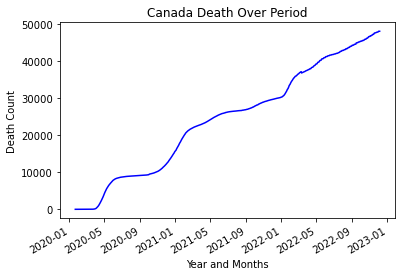

In [29]:
#Created an appropriate graph detailing all information
fig = plt.figure()

plt.plot_date(df_final['date'],df_final['Canada_Death_Cases'],'b-')

plt.title("Canada Death Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Death Count")

fig.autofmt_xdate()
plt.show()

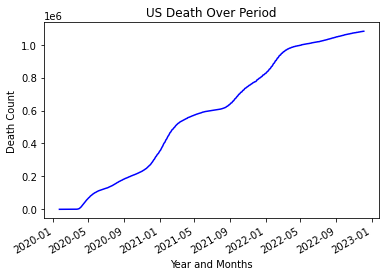

In [30]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['US Death Cases'],'b-')

plt.title("US Death Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Death Count")

fig.autofmt_xdate()
plt.show()

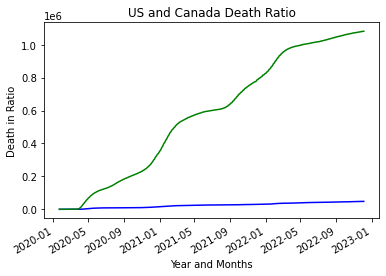

In [31]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada_Death_Cases'],'b-')
plt.plot_date(df_final['date'],df_final['US Death Cases'],'g-')

plt.title("US and Canada Death Ratio")
plt.xlabel("Year and Months")
plt.ylabel("Death in Ratio")

fig.autofmt_xdate()
plt.show()

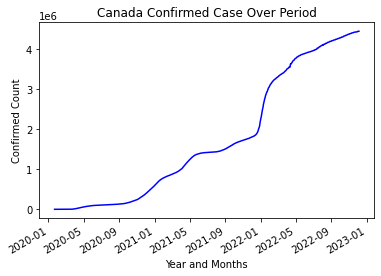

In [32]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada Confirmed Cases'],'b-')

plt.title("Canada Confirmed Case Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Confirmed Count")

fig.autofmt_xdate()
plt.show()

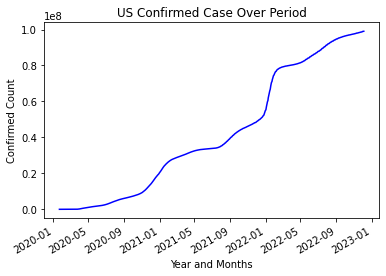

In [33]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['US Confirmed Cases'],'b-')

plt.title("US Confirmed Case Over Period")
plt.xlabel("Year and Months")
plt.ylabel("Confirmed Count")

fig.autofmt_xdate()
plt.show()

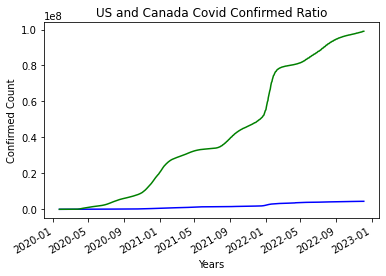

In [34]:
fig = plt.figure()
plt.plot_date(df_final['date'],df_final['Canada Confirmed Cases'],'b-')
plt.plot_date(df_final['date'],df_final['US Confirmed Cases'],'g-')

plt.title("US and Canada Covid Confirmed Ratio")
plt.xlabel("Years")
plt.ylabel("Confirmed Count")

fig.autofmt_xdate()
plt.show()